# FARE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 5m       1
41h 20m      1
27h 55m      1
29h 10m      1
33h 45m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train['Journey_Day']=pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
train['Journey_Month']=pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.month
train['Journey_Year']=pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.year
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [12]:
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
train['Dep_hr']=pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min']=pd.to_datetime(train['Dep_Time']).dt.minute
train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [14]:
train.drop(['Dep_Time'],axis=1,inplace=True)

In [15]:
train['Arrival_hr']=pd.to_datetime(train.Arrival_Time).dt.hour
train['Arrival_min']=pd.to_datetime(train.Arrival_Time).dt.minute
train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [16]:
train.drop(['Arrival_Time'],axis=1, inplace=True)

In [17]:
# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [19]:
train.drop(['Duration'], axis = 1, inplace = True)
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


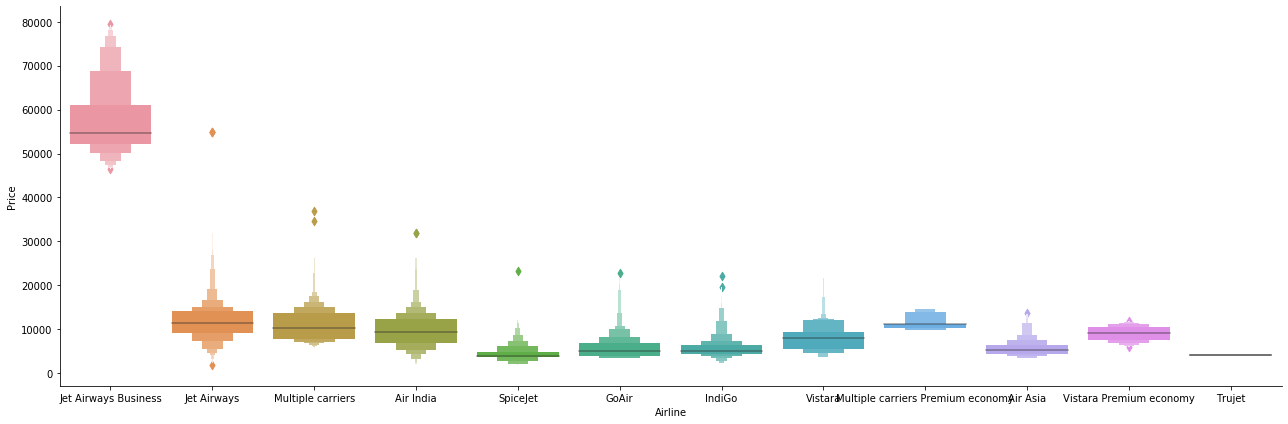

In [20]:
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [21]:
Airline = train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


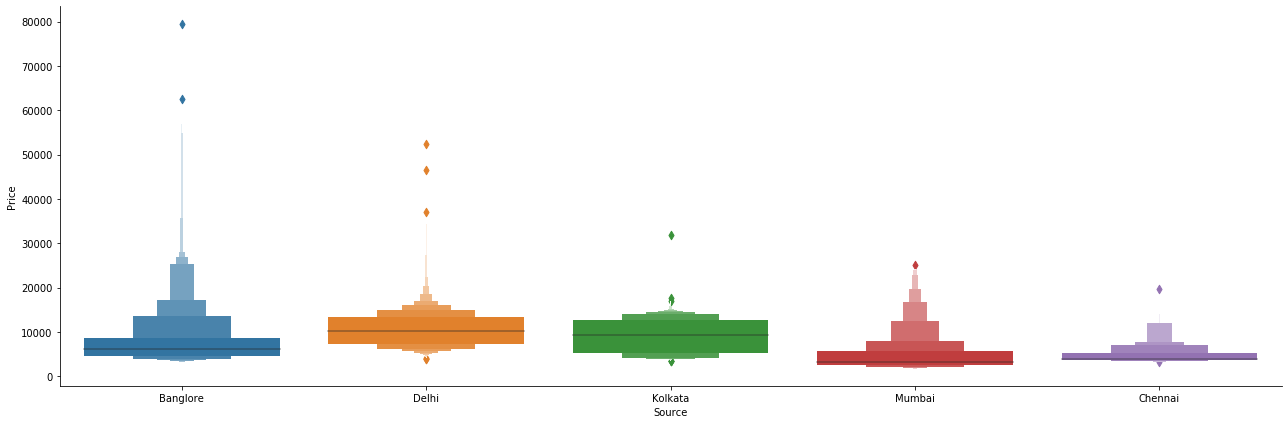

In [22]:
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
Source = train[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [25]:
Destination =  train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [26]:
train.drop(['Route','Additional_Info'],axis=1, inplace =True)

In [27]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)
train

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [29]:
train = pd.concat([train, Airline, Source, Destination],axis=1)
train

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [30]:
train.drop(['Airline','Source','Destination'],axis=1, inplace=True)
train

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [31]:
train1=train.copy()

In [32]:
test=pd.read_excel("Test_set.xlsx")
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [33]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [34]:
test['Journey_Day']=pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test['Journey_Month']=pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.month
test['Journey_Year']=pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.year
test.drop(["Date_of_Journey"], axis = 1, inplace = True)
test['Dep_hr']=pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min']=pd.to_datetime(test['Dep_Time']).dt.minute
test.drop(['Dep_Time'],axis=1,inplace=True)
test['Arrival_hr']=pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_min']=pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'],axis=1, inplace=True)
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [35]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [36]:
test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,2019,4,0,19,15,15,15


In [37]:
test.drop(['Duration'], axis = 1, inplace = True)
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,2019,4,0,19,15,15,15


In [38]:
Airline=test[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [39]:
Source=test[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [40]:
Destination=test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [41]:
test.drop(['Route','Additional_Info'],axis=1, inplace =True)
test

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,2019,4,0,19,15,15,15


In [42]:
test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)
test

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,2019,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,2019,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,2019,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,6,3,2019,4,0,19,15,15,15


In [43]:
test = pd.concat([test, Airline, Source, Destination],axis=1)
test

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,2019,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,0,27,3,2019,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,1,6,3,2019,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,1,6,3,2019,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [44]:
test.drop(['Airline','Source','Destination'],axis=1, inplace=True)
test

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,2019,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,2019,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,2019,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [45]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
X = train.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [47]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

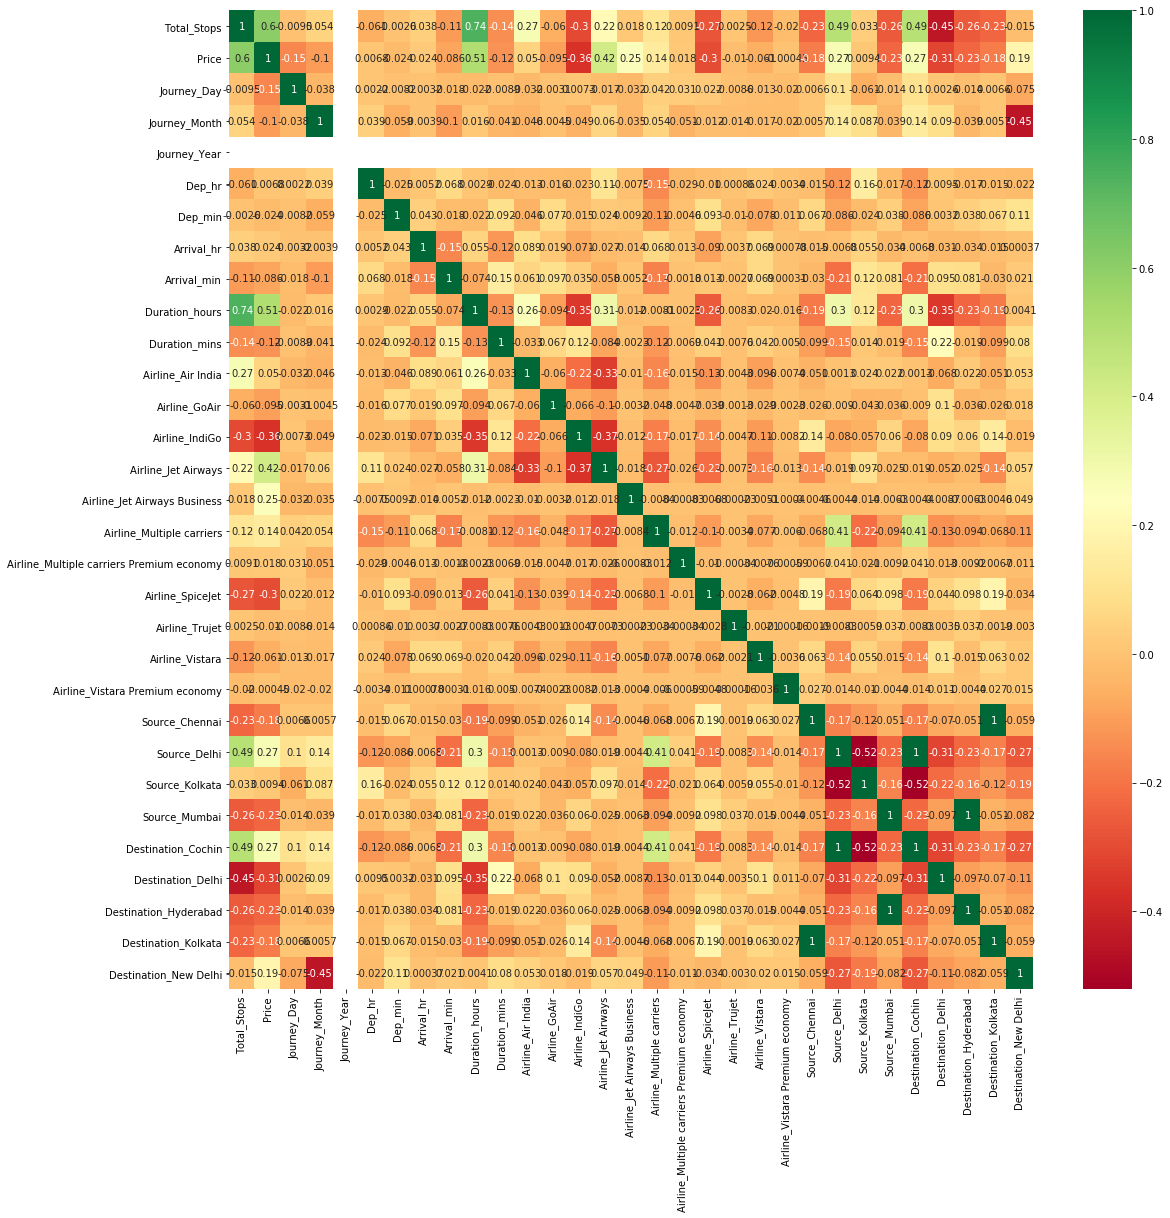

In [49]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [52]:
print(selection.feature_importances_)

[2.25696788e-01 1.44393391e-01 5.34414807e-02 0.00000000e+00
 2.42867697e-02 2.11887061e-02 2.81040184e-02 1.88329449e-02
 1.19456023e-01 1.76998223e-02 8.78304022e-03 2.06974453e-03
 2.00850608e-02 1.36393235e-01 6.76822135e-02 1.69119452e-02
 8.40212021e-04 3.64402143e-03 1.02009342e-04 4.68372770e-03
 8.01750650e-05 4.23664864e-04 1.48140751e-02 3.06045544e-03
 5.99684958e-03 1.17367770e-02 1.60858067e-02 8.32284559e-03
 4.18410278e-04 2.47657866e-02]


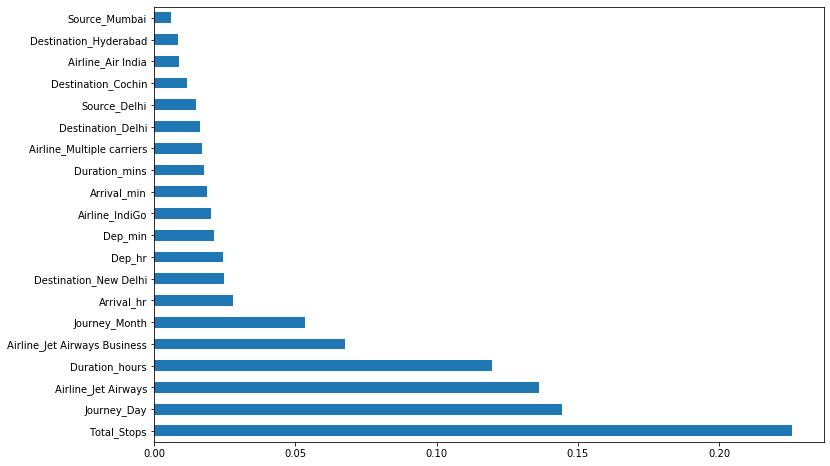

In [53]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind=('barh'))
plt.show()

In [54]:
train=np.log(train+1)

In [55]:
train

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.000000,8.268219,3.218876,1.386294,7.610853,3.135494,3.044522,0.693147,2.397895,1.098612,3.931826,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.693147
1,1.098612,8.944159,0.693147,1.791759,7.610853,1.791759,3.931826,2.639057,2.772589,2.079442,3.258097,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,1.098612,9.538420,2.302585,1.945910,7.610853,2.302585,3.258097,1.609438,3.258097,2.995732,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.000000
3,0.693147,8.735364,2.564949,1.791759,7.610853,2.944439,1.791759,3.178054,3.433987,1.791759,3.258097,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.693147,9.495745,0.693147,1.386294,7.610853,2.833213,3.931826,3.091042,3.583519,1.609438,3.828641,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.000000,8.320692,2.302585,1.609438,7.610853,2.995732,4.025352,3.135494,3.258097,1.098612,3.433987,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000
10679,0.000000,8.329899,3.332205,1.609438,7.610853,3.044522,3.828641,3.178054,3.044522,1.098612,3.583519,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000
10680,0.000000,8.885994,3.332205,1.609438,7.610853,2.197225,3.044522,2.484907,3.044522,1.386294,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.000000
10681,0.000000,9.445333,0.693147,1.386294,7.610853,2.484907,3.433987,2.708050,2.397895,1.098612,3.713572,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.693147


In [56]:
test = np.log(test+1)

In [57]:
test

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.693147,1.945910,1.945910,7.610853,2.890372,3.433987,1.609438,3.258097,2.397895,4.025352,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0
1,0.693147,2.564949,1.791759,7.610853,1.945910,3.044522,2.397895,3.044522,1.609438,0.000000,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.693147,3.091042,1.791759,7.610853,2.995732,2.772589,2.995732,0.000000,3.178054,3.828641,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0
3,0.693147,3.091042,1.791759,7.610853,2.197225,0.000000,3.091042,0.000000,2.639057,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0
4,0.000000,3.218876,1.945910,7.610853,3.178054,4.025352,1.098612,3.828641,1.098612,3.931826,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.693147,1.945910,1.945910,7.610853,3.044522,3.433987,3.044522,3.258097,3.178054,4.025352,0.693147,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.0
2667,0.000000,3.332205,1.386294,7.610853,2.708050,3.044522,2.833213,4.025352,1.098612,3.583519,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.0
2668,0.693147,1.945910,1.386294,7.610853,3.091042,3.931826,1.609438,3.258097,1.945910,3.583519,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0
2669,0.693147,1.945910,1.386294,7.610853,1.609438,0.000000,2.995732,2.772589,2.772589,2.772589,0.693147,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0


In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train)
train = scaler.transform(train)


In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(test)
test = scaler.transform(test)


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred = reg_rf.predict(X_test)


In [63]:
reg_rf.score(X_train, y_train)

0.9543118176711063

In [64]:
reg_rf.score(X_test, y_test)


0.7964230227043712

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1174.4370306899464
MSE: 4389538.250750952
RMSE: 2095.1224906317416


In [67]:
metrics.r2_score(y_test,y_pred)

0.7964230227043712

In [68]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [69]:
br_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=1000,
                 n_jobs=None, oob_score=False, random_state=51, verbose=0,
                 warm_start=False)

In [71]:
br_reg.score(X_test, y_test)


0.7984930551320657

In [72]:
gbr_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=51, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
gbr_reg.score(X_test, y_test)


0.8440108690358171

In [76]:
prediction = gbr_reg.predict(X_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1253.7324467990256
MSE: 3363446.4278067565
RMSE: 1833.9701272939963


In [78]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(gbr_reg, file)

In [80]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [81]:
y_prediction = forest.predict(X_test)

In [82]:
metrics.r2_score(y_test, y_prediction)

0.8440108690358172